## When are our fields up and where is the sun?

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u, constants as c
from astropy.time import Time
from astropy.coordinates import get_body
from astropy.coordinates import Angle, SkyCoord, EarthLocation, AltAz
from astropy.coordinates import ICRS, Galactic, FK4, FK5, GeocentricMeanEcliptic

%matplotlib widget

In [5]:
def small_ang(t1, t2):
    '''
    Calculate the shortest angular distance between two angles
    '''
    stck = np.stack([t1, -t2])

    dt1 = np.abs(stck.sum(axis=0))
    dt2 = 360 - dt1

    dt = np.stack([dt1, dt2])

    #print(dt1, dt2)
    ang = np.min(dt, axis=0)

    return ang

In [6]:
mcmurdo = EarthLocation(lat='-77.8419', lon='166.6863', height=37000.)
new_location = EarthLocation(lat='-85', lon='166.6863', height=37000.)
location = new_location
launch_date = Time('2026-12-25 00:00:00', scale='utc', location = location)
times = launch_date + np.arange(25)*u.hr

datestr = str(launch_date.datetime64).split('T')[0]
latstr = str(location.lat)

In [7]:
sun_body = get_body('sun', times, location=mcmurdo)

In [8]:
sun = SkyCoord(ra=sun_body.ra, dec=sun_body.dec, obstime=times, location=mcmurdo)
sun_altaz = sun.transform_to('altaz')
sun_altaz.name = 'Sun'

In [9]:
field_S = SkyCoord(ra=12*15.*u.degree,dec=-55*u.degree, 
                   obstime=times, location=mcmurdo)
field_S_altaz = field_S.transform_to('altaz')
field_S_altaz.name = 'SPT-Deep'

In [10]:
field_N = SkyCoord(ra=3.*15*u.degree,dec=-27*u.degree, 
                   obstime=times, location=mcmurdo)
field_N_altaz = field_N.transform_to('altaz')
field_N_altaz.name = 'GOODS-S'

In [11]:
SEP_radec = SkyCoord(0, -90, unit='deg', frame=GeocentricMeanEcliptic).transform_to(ICRS) 
SEP = SkyCoord(ra=SEP_radec.ra, dec=SEP_radec.dec+5*u.deg, obstime = times, location = mcmurdo)
SEP_altaz = SEP.transform_to('altaz')

In [12]:
gal_tgt = SkyCoord(ra='17h45m40s', dec='-29d0m28s', obstime=times, location=mcmurdo)
gal_tgt_altaz = gal_tgt.transform_to('altaz')

In [13]:
molecular_clouds = [
    # Source list from https://iopscience.iop.org/article/10.3847/1538-4357/aad7b2/pdf
    # 'Flame Nebula', # out of el range
    # 'Orion Nebula', # out of el range
    # 'W40', # out of el range
    'RCW 36',
    # 'Lagoon Nebula', # out of az range
    # 'Trifid Nebula', # out of az range
    # 'NGC 6334', # out of az range
    'RCW 38',
    # 'Eagle Nebula', # out of az range
    # 'Berkeley 87', # out of el range
    # 'NGC 6357', # out of az range
    # 'M17', # out of az range
    # 'W3', # out of el range
    # 'W42', # out of el range
    # 'W4', # out of el range
    # 'W33', # out of az range
    # 'G333', # failed to SIMBAD
    # 'NGC 7538', # out of el range
    'Carina Nebula',
    'NGC 3576',
    # # 'G305', # failed to SIMBAD
    # 'Westerlund 1', # out of az range
    'RCW 49',
    # 'W51A', # out of el range
    # 'W43', # out of el range
    # # 'G29.96-0.02', # failed to SIMBAD
    'NGC 3603',
    # 'W49A', # out of el range

    # Ian suggestions
    # 'rho ophiuchus', # out of az range
    # 'TMC-1', # out of el range
    'Vela Molecular Ridge',
    # 'pyxis molecular cloud'
    # 'RCW 92b', # out of az range
]

cloud_tgts = []
cloud_radecs = []
for cloud in molecular_clouds:
    radec = SkyCoord.from_name(cloud)
    radec.name = cloud
    cloud_radecs.append(radec)
    cloud_coord = SkyCoord(radec.ra, radec.dec, obstime=times, location=mcmurdo)
    cloud_altaz = cloud_coord.transform_to('altaz')
    cloud_altaz.name = cloud
    cloud_tgts.append(cloud_altaz)

In [14]:
t_hr = (times - times[0]).to(u.hr)

In [15]:
colors = {'sun': 'orange', 'S': 'blue', 'N': 'green', 'cal': 'magenta'}

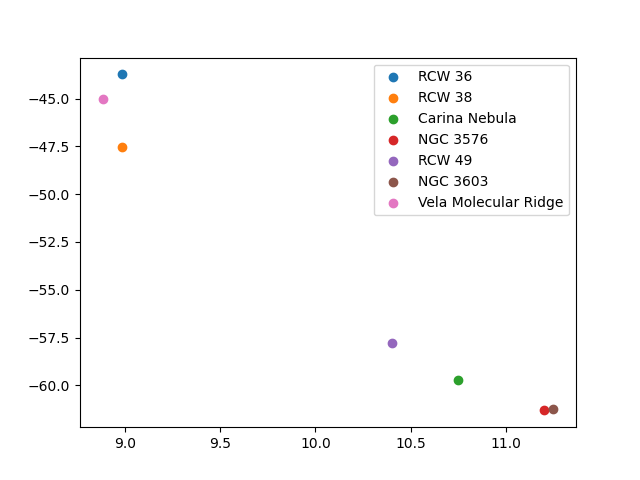

In [16]:
fig, ax = plt.subplots()
for radec in cloud_radecs:
    ra, dec = radec.ra, radec.dec
    ax.scatter(ra/360 * 24, dec, label=radec.name)
ax.legend()

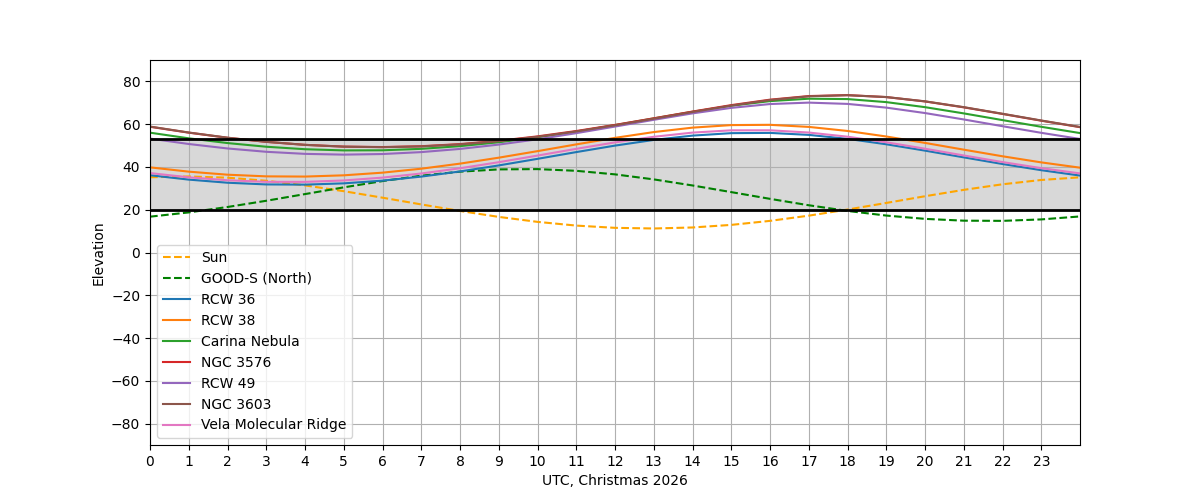

In [17]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t_hr, sun_altaz.alt, label='Sun', linestyle='--', color='orange')
# ax.plot(t_hr, field_S_altaz.alt, label='SPT Deep (South)', color='blue')
ax.plot(t_hr, field_N_altaz.alt, label='GOOD-S (North)', linestyle='--', color='green')
#ax.plot(t_hr, SEP_altaz.alt, label='SEP + 5 deg')
#ax.plot(t_hr, RCW92b_altaz.alt, label='RCW92b')

for cloud in cloud_tgts:
    ax.plot(t_hr, cloud.alt, label=cloud.name)

ax.axhline(20, color='black', linewidth=2)
ax.axhline(53, color='black', linewidth=2)
ax.fill_between(x = t_hr.value, y1=20, y2=53, color='gray', alpha=0.3)
ax.set_ylim([-90,90])
ax.set_xlim([0, 24])
ax.set_xticks(np.arange(24))
ax.grid()
ax.set_xlabel('UTC, Christmas 2026')
ax.set_ylabel('Elevation')
ax.legend();

In [18]:
# fig = plt.figure(figsize=(12,5))
# ax = fig.add_subplot(1, 1, 1)
# ax.plot(t_hr, sun_altaz.alt, label='Sun', color='orange')
# ax.plot(t_hr, field_S_altaz.alt, label='SPT Deep (South)', color='blue')
# ax.plot(t_hr, field_N_altaz.alt, label='GOOD-S (North)', color='green')
# #ax.plot(t_hr, SEP_altaz.alt, label='SEP + 5 deg')
# ax.plot(t_hr, RCW38_altaz.alt, label='RCW38', color='purple')
# #ax.plot(t_hr, RCW92b_altaz.alt, label='RCW92b')
# ax.axhline(20, color='black', linewidth=2)
# ax.axhline(53, color='black', linewidth=2)
# ax.fill_between(x = t_hr.value, y1=20, y2=53, color='gray', alpha=0.3)
# ax.set_ylim([0,90])
# ax.set_xlim([0, 24])
# ax.set_xticks(np.arange(24))
# ax.grid()
# ax.set_xlabel('UTC, Christmas 2026')
# ax.set_ylabel('Elevation')
# ax.legend();

In [19]:
# # Make this with LST as the axis
# fig = plt.figure(figsize=(12,5))
# ax = fig.add_subplot(1, 1, 1)
# ax.plot(t_hr, sun_altaz.alt, label='Sun', color='orange')
# ax.plot(t_hr, field_S_altaz.alt, label='SPT Deep (South)', color='blue')
# ax.plot(t_hr, field_N_altaz.alt, label='GOOD-S (North)', color='green')
# #ax.plot(t_hr, SEP_altaz.alt, label='SEP + 5 deg')
# ax.plot(t_hr, RCW38_altaz.alt, label='RCW38', color='purple')
# #ax.plot(t_hr, RCW92b_altaz.alt, label='RCW92b')
# ax.axhline(20, color='black', linewidth=2)
# ax.axhline(53, color='black', linewidth=2)
# ax.fill_between(x = t_hr.value, y1=20, y2=53, color='gray', alpha=0.3)
# ax.set_ylim([0,90])
# ax.set_xlim([0, 24])
# ax.set_xticks(np.arange(24))
# ax.grid()
# ax.set_xlabel('UTC, Christmas 2026')
# ax.set_ylabel('Elevation')
# ax.legend();

In [20]:
def wrap360(ang):
    return ((ang + 360.) % 360.)

In [21]:
sun_altaz.az.deg.min(), sun_altaz.az.deg.max()

(14.923543235565324, 358.03894694094697)

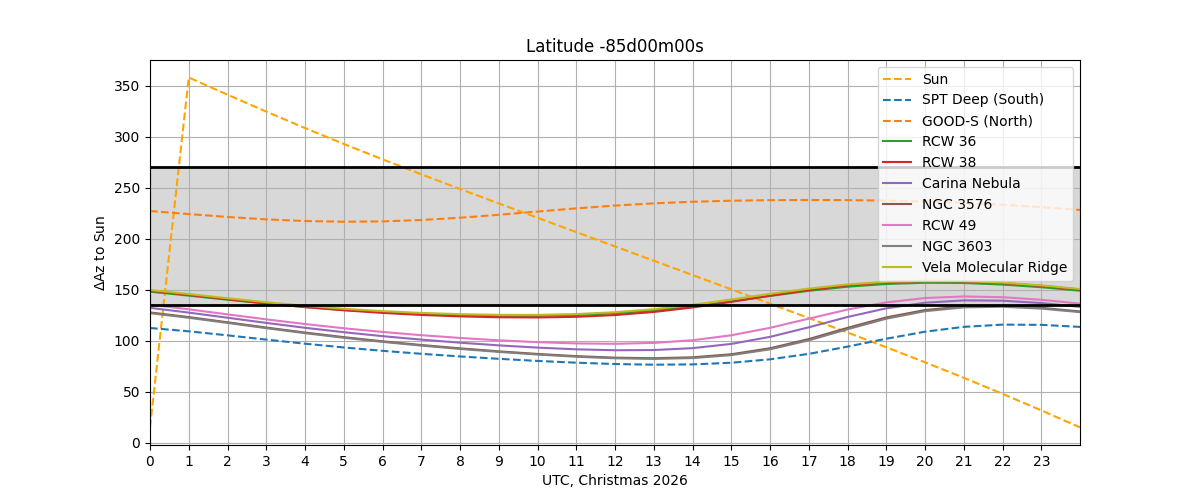

In [22]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1, 1, 1)
# ax.plot(t_hr, small_ang(sun_altaz.az.deg, field_S_altaz.az.deg), linestyle='--', label='SPT Deep (South)')
# ax.plot(t_hr, small_ang(sun_altaz.az.deg, field_N_altaz.az.deg), linestyle='--', label='GOOD-S (North)')
# ax.plot(t_hr, small_ang(sun_altaz.az.deg, RCW38_altaz.az.deg), label='RCW 38')

# for cloud_tgt in cloud_tgts:
#     ax.plot(t_hr, small_ang(sun_altaz.az.deg, cloud_tgt.az.deg), label=cloud_tgt.name)

ax.plot(t_hr, sun_altaz.az.deg, label='Sun', linestyle='--', color='orange')

ax.plot(t_hr, wrap360(sun_altaz.az.deg - field_S_altaz.az.deg), linestyle='--', label='SPT Deep (South)')
ax.plot(t_hr, wrap360(sun_altaz.az.deg - field_N_altaz.az.deg), linestyle='--', label='GOOD-S (North)')
# ax.plot(t_hr, wrap360(sun_altaz.az.deg - RCW38_altaz.az.deg), label='RCW 38')

for cloud_tgt in cloud_tgts:
    ax.plot(t_hr, wrap360(sun_altaz.az.deg - cloud_tgt.az.deg), label=cloud_tgt.name)

ax.axhline(135, color='black', linewidth=2)
ax.axhline(270, color='black', linewidth=2)
ax.fill_between(x = t_hr.value, y1=135, y2=270, color='gray', alpha=0.3)
# ax.fill_between(x = t_hr.value, y1=270, y2=0, color='gray', alpha=0.3)
#ax.set_ylim([])
ax.set_xlim([0, 24])
ax.set_xticks(np.arange(24))
ax.grid()
ax.set_xlabel('UTC, Christmas 2026')
ax.set_ylabel('$\Delta$Az to Sun')
ax.set_title('Latitude '+latstr)
ax.legend();

RCW 36 239.24335050797043
RCW 38 237.97137454896412
Carina Nebula 254.7766061435484
NGC 3576 259.4519251786815
RCW 49 251.56878263240768
NGC 3603 260.21319436261876
Vela Molecular Ridge 237.49378983756841


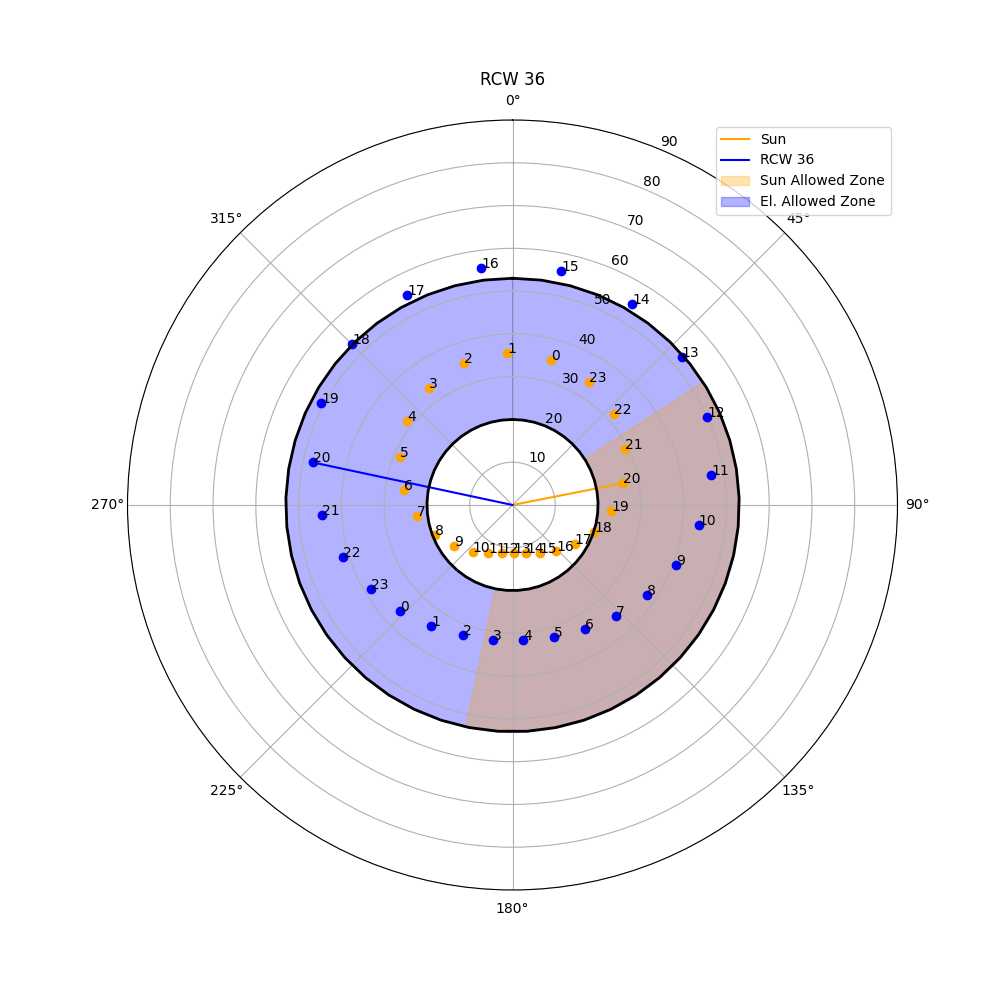

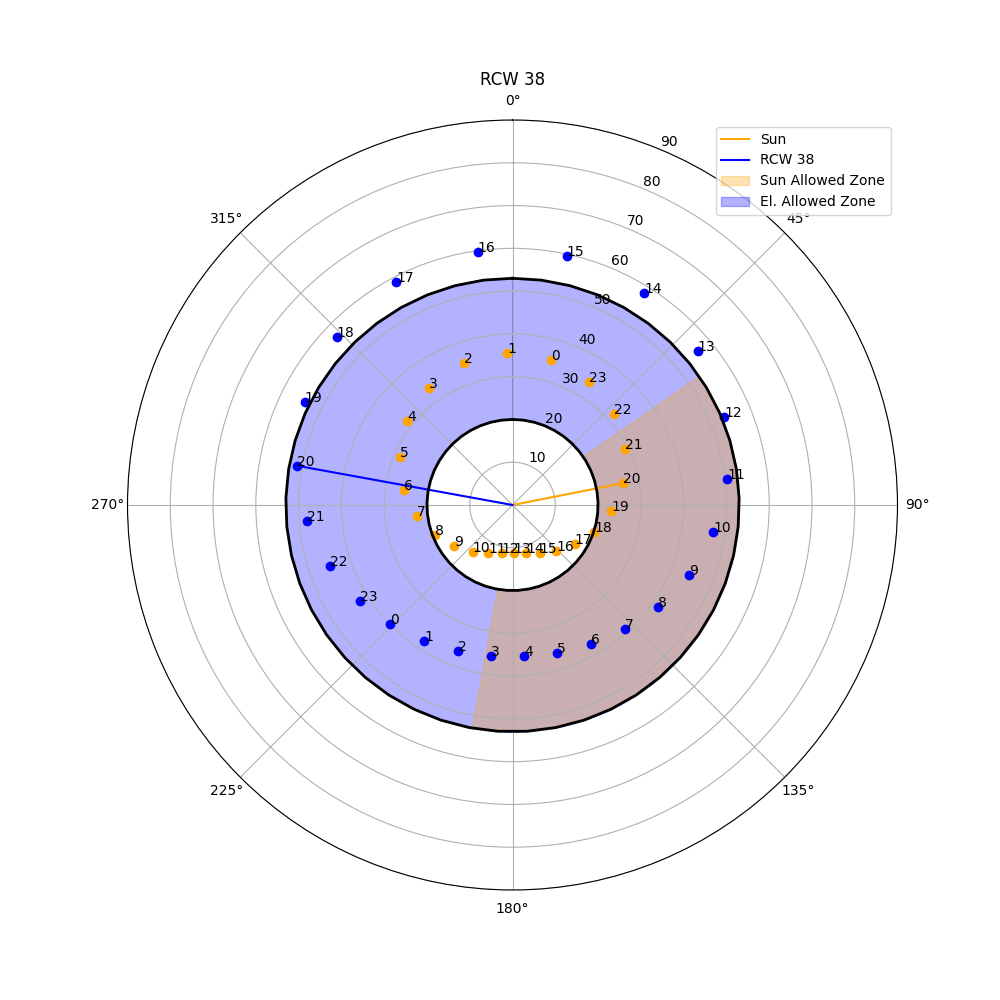

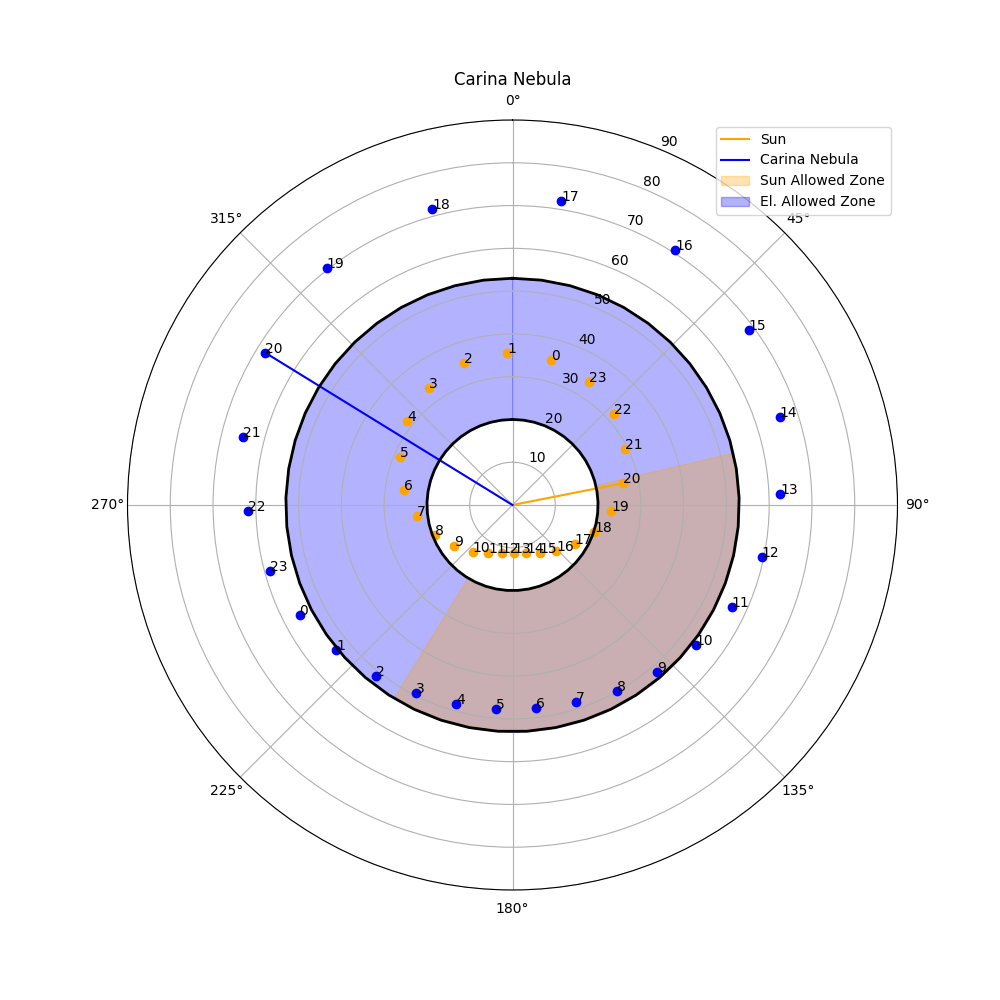

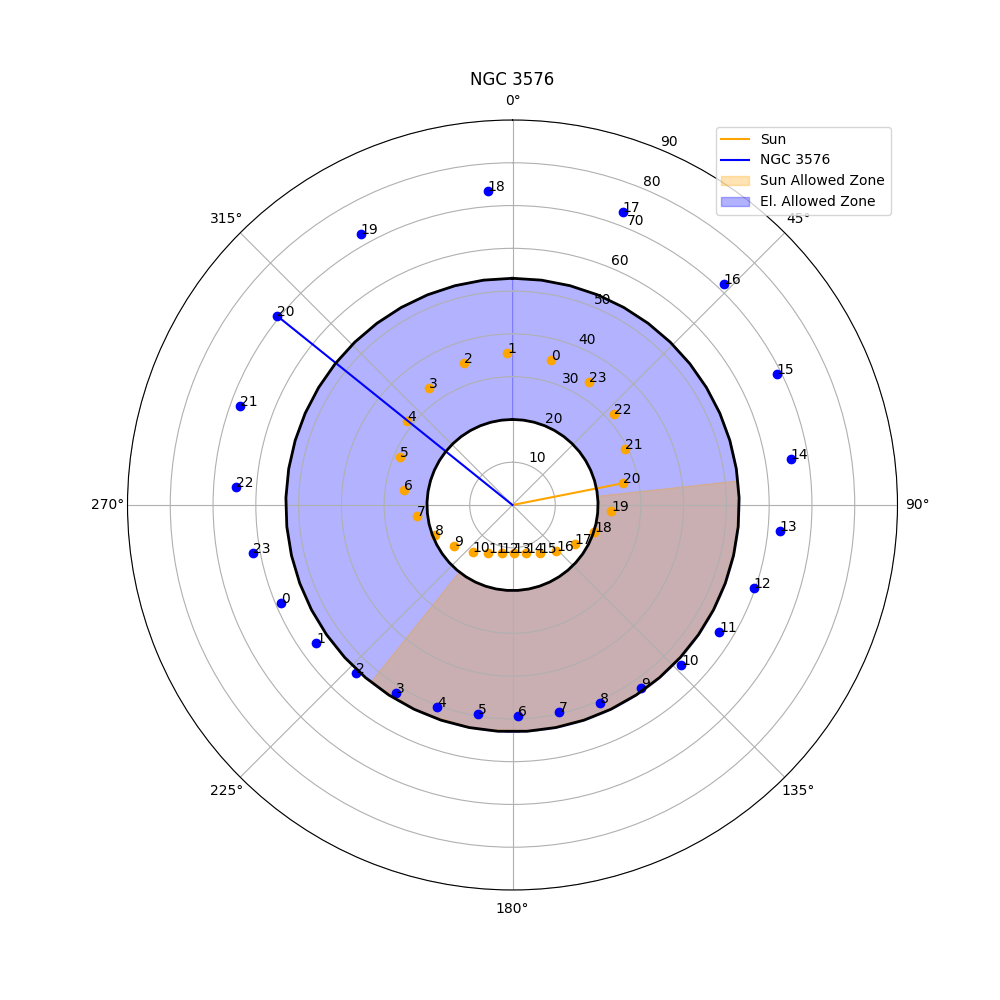

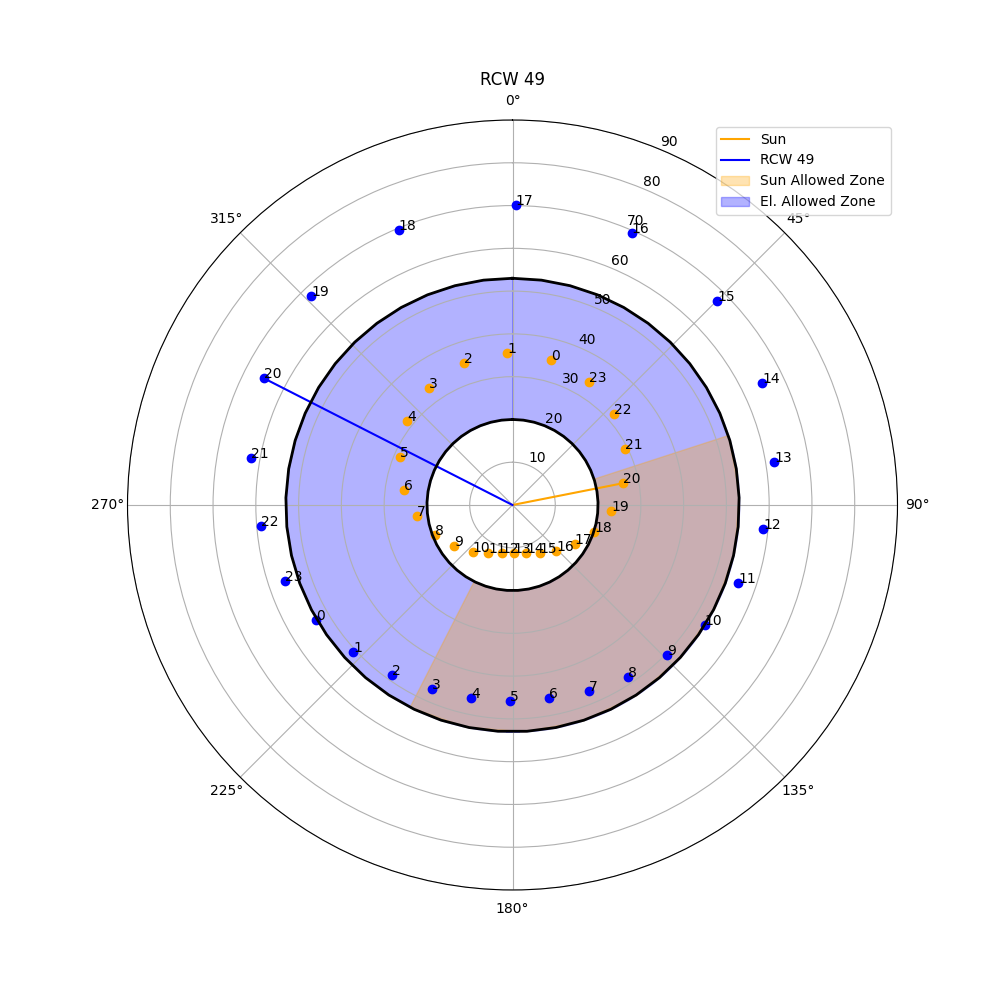

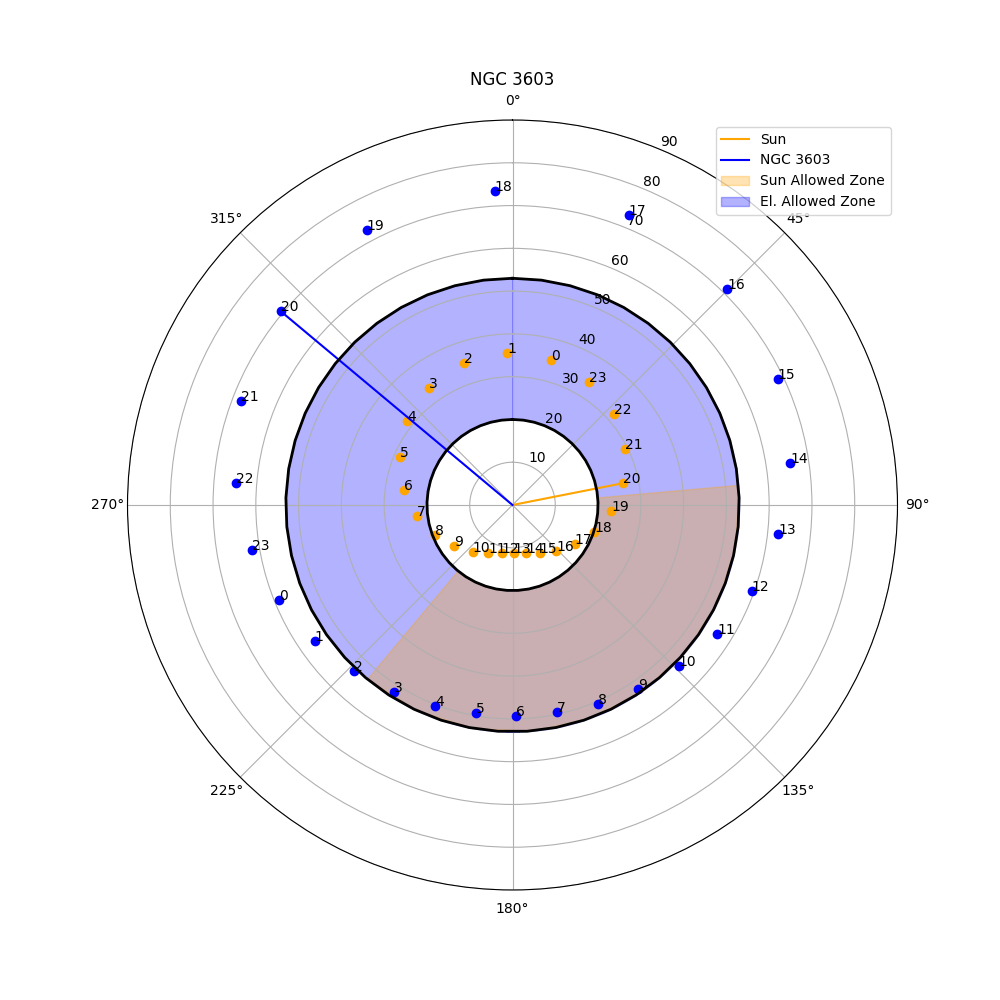

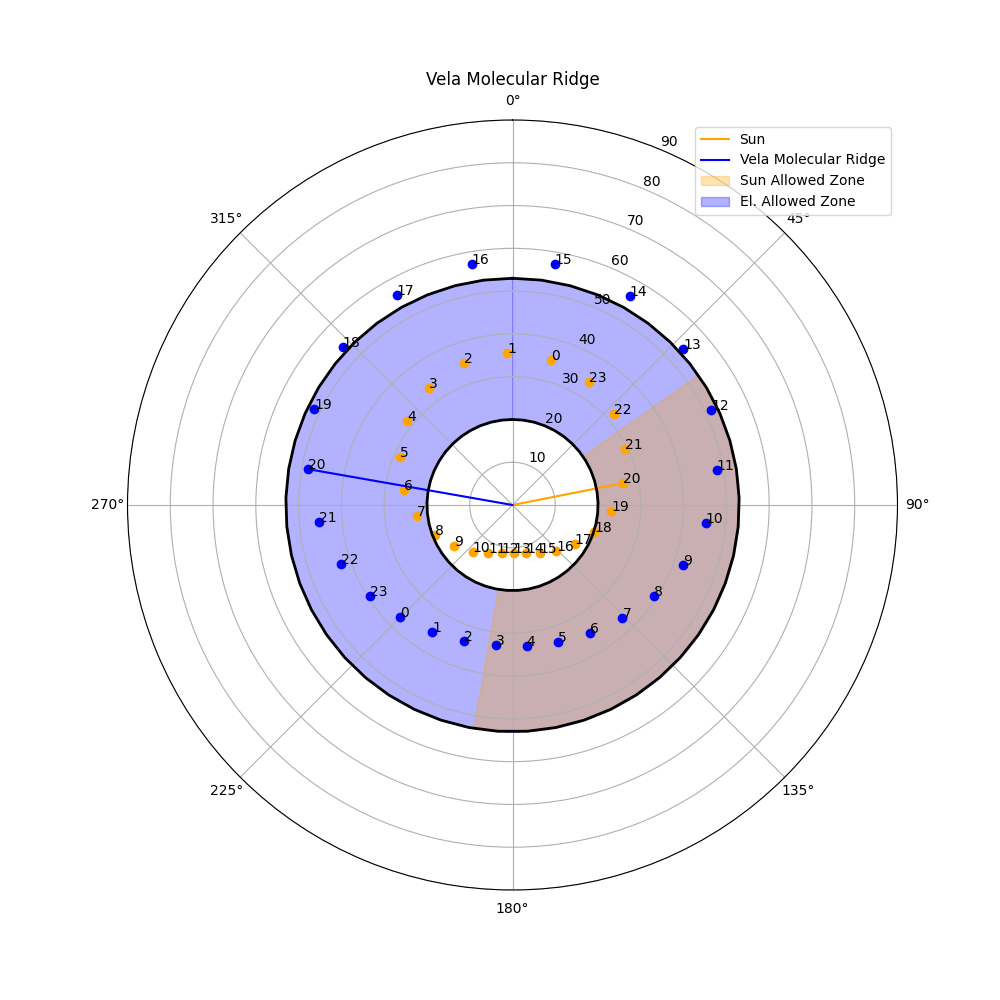

In [41]:
from matplotlib.patches import Rectangle

def polar_object(sun_altaz, object_altaz, day_hr):
    fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': 'polar'})
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    for i in np.arange(0, len(t_hr)-1):
        r_sun = sun_altaz.alt[i].value
        theta_sun = sun_altaz.az.to(u.rad)[i].value

        r = object_altaz.alt[i].value
        theta = object_altaz.az.to(u.rad)[i].value 

        plt.polar(theta_sun, r_sun, marker='o', color='orange')
        plt.text(theta_sun, r_sun, '{:d}'.format(int(np.round(t_hr[i].value))))

        plt.polar(theta, r, marker='o', color='blue')
        plt.text(theta, r, '{:d}'.format(int(np.round(t_hr[i].value))))
        
        if i == day_hr:
            plt.polar([theta_sun, theta_sun], [0, r_sun], color='orange', label='Sun')
            plt.polar([theta, theta], [0, r], color='blue', label=object_altaz.name)
            ax.fill_between(np.linspace(theta+(135*np.pi/180), theta+(270*np.pi/180), 10), 20, 53, color='orange', alpha=0.3, label='Sun Allowed Zone')

    plt.polar(np.linspace(0, 2*np.pi, 50), np.ones(50)*20, color='black', linewidth=2)
    plt.polar(np.linspace(0, 2*np.pi, 50), np.ones(50)*53, color='black', linewidth=2)
    ax.fill_between(np.linspace(0, 2*np.pi, 100), y1=20, y2=53, color='blue', alpha=0.3, zorder=0, label='El. Allowed Zone')
    print(object_altaz.name, theta * 180 / np.pi)
    plt.ylim([0, 90])
    plt.legend()
    plt.title(object_altaz.name)
    # plt.savefig('polar_view.png')

for cloud_tgt in cloud_tgts:
    polar_object(sun_altaz, cloud_tgt, 20)

(<Angle 11.22908215 deg>, <Angle 35.54791245 deg>)

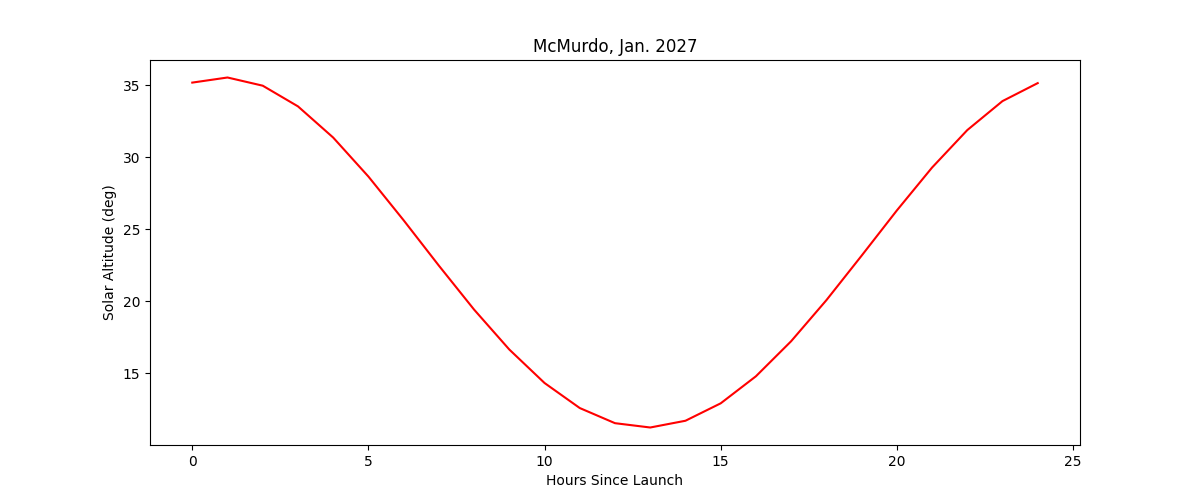

In [24]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1, 1, 1)
# ax.plot(t_hr, sun_altaz.az, label='Az', color='blue')
ax.plot(t_hr, sun_altaz.alt, label='Alt', color='red')
ax.set_title('McMurdo, Jan. 2027')
ax.set_xlabel('Hours Since Launch')
ax.set_ylabel('Solar Altitude (deg)')

sun_altaz.alt.min(), sun_altaz.alt.max()

### Fort Sumner Test Flight Sun

In [25]:
# fts = EarthLocation(lat='34.49017', lon='-104.21825', height=36576.)
# launch_date = Time('2024-09-23 13:27:00', scale='utc', location = fts)
# times = launch_date + np.arange(60*10)*u.min
# t_hr_fts = (times - times[0]).to(u.hr)

# sun_body = get_body('sun', times, location=fts)

# sun = SkyCoord(ra=sun_body.ra, dec=sun_body.dec, obstime=times, location=fts)
# sun_altaz = sun.transform_to('altaz')

# fig = plt.figure(figsize=(12,5))
# ax = fig.add_subplot(1, 1, 1)
# ax.plot(t_hr_fts, sun_altaz.alt, label='Sun', color='orange')
# # ax.plot(t_hr, sun_altaz.az, label='Sun', color='blue')
# ax.set_title('Fort Sumner, Sept. 2024')
# ax.set_xlabel('Hours Since Launch')
# ax.set_ylabel('Solar Altitude (deg)')

# sun_altaz.alt.min(), sun_altaz.alt.max()

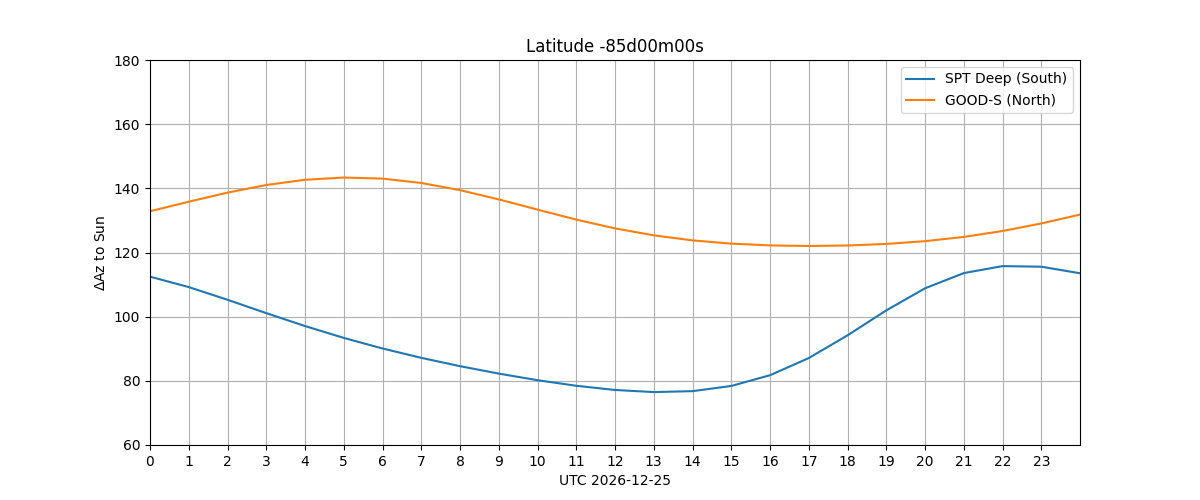

In [26]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1, 1, 1)
#ax.plot(t_hr, sun_altaz.alt, label='Sun')
ax.plot(t_hr, small_ang(field_S_altaz.az.deg, sun_altaz.az.deg), label='SPT Deep (South)')
ax.plot(t_hr, small_ang(field_N_altaz.az.deg, sun_altaz.az.deg), label='GOOD-S (North)')
#ax.plot(t_hr, SEP_altaz.az - sun_altaz.az, label='SEP + 5 deg')
#ax.axhline(20, color='black', linewidth=2)
#ax.axhline(53, color='black', linewidth=2)
#ax.fill_between(x = t_hr.value, y1=20, y2=53, color='gray', alpha=0.3)
#ax.set_ylim([])
ax.set_xlim([0, 24])
ax.set_ylim([60,180])
ax.set_xticks(np.arange(24))
ax.grid()
ax.set_title('Latitude '+latstr)
ax.set_xlabel('UTC '+ datestr)
ax.set_ylabel('$\Delta$Az to Sun')
ax.legend();

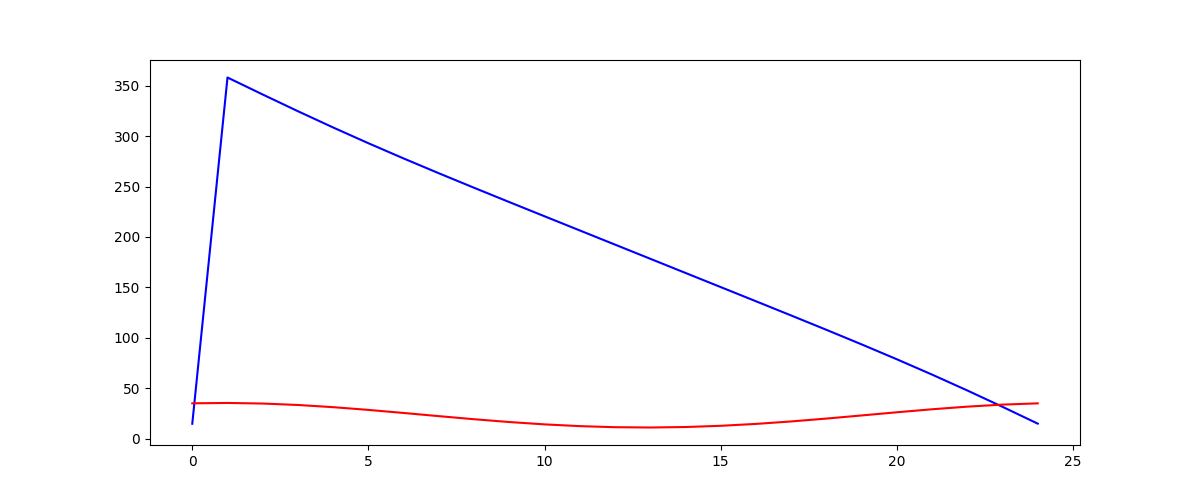

In [27]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t_hr, sun_altaz.az, label='Az', color='blue')
ax.plot(t_hr, sun_altaz.alt, label='Alt', color='red')